In [1]:
import sys
sys.path.append("..")
%cd ..

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021-1


In [2]:
from statsmodels.tsa.statespace.varmax import VARMAX
from Modelling import modelling
import matplotlib.pyplot as plt
from DataPrep.ImportData import importer
from DataPrep.LagCreation import lags
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import pyforest
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = importer().Import()

In [4]:
def smape(A, F):
    return 100/len(A) * np.sum( np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [72]:

res = pd.DataFrame(columns=["Label 0","Label 1","Label 2","Label 3","Label 4","Label 5","Label 6","Label 7"])
exog = pd.DataFrame(columns=["Label 0","Label 1","Label 2","Label 3","Label 4","Label 5","Label 6","Label 7"])
for label in range(8):
    print(f"Label: {float(label)}")
    df1=df[df["Label"]==float(label)]
    df1=df1.sort_values("Start Date")
    y = df1[["Energy (kWh)","Start Date"]].set_index("Start Date",drop=False)

    #y= y.resample("d").min()
    X = lags().buildLaggedFeatures(y["Energy (kWh)"], ["Energy (kWh)"],5, dropna=False)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42, shuffle=False)
    X_train=X_train.drop(columns="lag_0")
    X_test=X_test.drop(columns="lag_0")
    X_val=X_val.drop(columns="lag_0")

    y_train = y_train.set_index("Start Date",drop=False)
    y_test = y_test.set_index("Start Date",drop=False)
    y_val = y_val.set_index("Start Date",drop=False)

    y_train.freq= "D"
    y_val.freq= "D"
    y_test.freq= "D"
    y_train = y_train.resample("d").min()
    y_test = y_test.resample("d").min()
    y_val = y_val.resample("d").min()

    X_train = X_train.resample("d").min()
    X_test = X_test.resample("d").min()
    X_val = X_val.resample("d").min()
   
    y_train["Energy (kWh)"]  = y_train["Energy (kWh)"].fillna(0)
    y_test["Energy (kWh)"]  = y_test["Energy (kWh)"].fillna(0)
    y_val["Energy (kWh)"]  = y_val["Energy (kWh)"].fillna(0)
    if label==0:
        idx_train = pd.date_range(start = y_train["Start Date"].min(), end=y_train["Start Date"].max(), freq="D")
        idx_val = pd.date_range(start = y_val["Start Date"].min(), end=y_val["Start Date"].max(), freq="D")
        idx_test = pd.date_range(start = y_test["Start Date"].min(), end=y_test["Start Date"].max(), freq="D")
        
        y_train = y_train.append(pd.DataFrame({"Energy (kWh)":np.zeros(len(idx_train)),"Start Date":idx_train}))
        y_train = y_train.set_index("Start Date",drop=False)


        y_val = y_val.append(pd.DataFrame({"Energy (kWh)":np.zeros(len(idx_val)),"Start Date":idx_val}))
        y_val = y_val.set_index("Start Date",drop=False)


        y_test = y_test.append(pd.DataFrame({"Energy (kWh)":np.zeros(len(idx_test)),"Start Date":idx_test}))
        y_test = y_test.set_index("Start Date",drop=False)


        X_train = X_train.append(pd.DataFrame({"Energy (kWh)":np.zeros(len(idx_train)),"Start Date":idx_train}))
        X_train = X_train.set_index("Start Date",drop=False)
        X_val = X_val.append(pd.DataFrame({"Energy (kWh)":np.zeros(len(idx_val)),"Start Date":idx_val}))
        X_test = X_test.append(pd.DataFrame({"Energy (kWh)":np.zeros(len(idx_test)),"Start Date":idx_test}))

    res[f"Label {label}"] = y_train["Energy (kWh)"]
    exog[f"Label {label}"] = X_train["lag_1"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Label: 0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Label: 1.0
Label: 2.0
Label: 3.0
Label: 4.0
Label: 5.0
Label: 6.0
Label: 7.0


In [73]:
exog

,Label 0,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7
Start Date,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,1.562364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,1.726841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,2.325573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,1.260311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2017-08-17,NaN,2.691587,2.257769,3.322226,1.707526,3.132630,2.321489,2.296129
2017-08-18,NaN,2.836964,2.489758,4.255667,1.802300,2.451825,2.434056,2.438667
2017-08-19,NaN,2.834679,2.533874,3.570545,2.272300,2.943384,2.158226,5.232000


In [54]:
res = res.fillna(0)
res


,Label 0,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7
Start Date,,,,,,,,
2011-07-29,1.562364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-07-30,1.726841,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-07-31,2.325573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08-01,1.260311,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08-02,2.098609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2017-08-17,0.000000,2.836964,2.489758,4.255667,1.802300,2.451825,2.434056,2.438667
2017-08-18,0.000000,2.834679,2.533874,3.570545,2.272300,2.943384,2.158226,5.232000
2017-08-19,0.000000,3.113306,2.646528,4.211074,2.189803,1.922590,2.315737,1.409333


In [10]:
mod = VARMAX(res,exog= order=(2,0), trend='n')
mod_fit = mod.fit()
mod_fit.summary()

Dep. Variable:,"['Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7']",No. Observations:,2672
Model:,VAR(2),Log Likelihood,-11465.165
Date:,"Tue, 06 Apr 2021",AIC,23258.330
Time:,16:36:50,BIC,24224.386
Sample:,0,HQIC,23607.870
,- 2672,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"35.83, 4.61, 13.08, 29.63, 17.02, 38.65, 29.74, 8.21",Jarque-Bera (JB):,"38476.23, 947.88, 1411.56, 4637.52, 4953.90, 6418.24, 100702.80, 20394.33"
Prob(Q):,"0.00, 0.03, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00",Prob(JB):,"0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00"
Heteroskedasticity (H):,"1.07, 0.26, 0.37, 88.03, 639.98, 426.65, 791.37, 472.92",Skew:,"1.32, 0.29, 0.12, 0.56, 0.88, 0.55, 1.70, 0.38"
Prob(H) (two-sided):,"0.33, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00",Kurtosis:,"21.40, 5.86, 6.55, 9.36, 9.43, 10.51, 32.88, 16.51"


In [24]:
y_train["Start Date"][0].date()

datetime.date(2016, 1, 15)

In [30]:
y_pred = mod_fit.predict(start=y_train["Start Date"][0],end=y_val["Start Date"][-1])

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

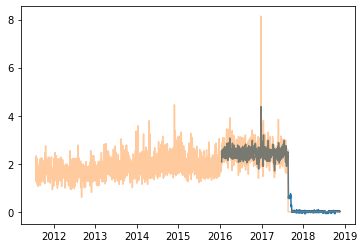

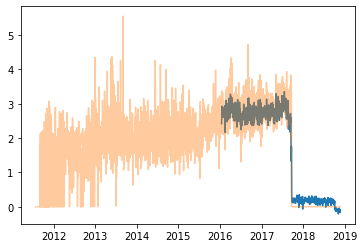

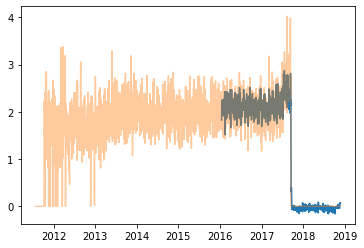

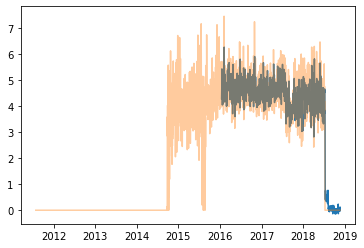

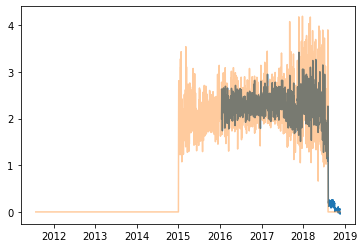

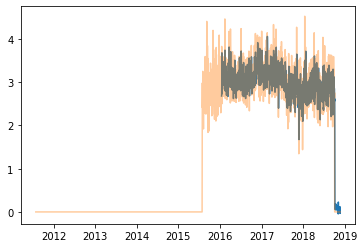

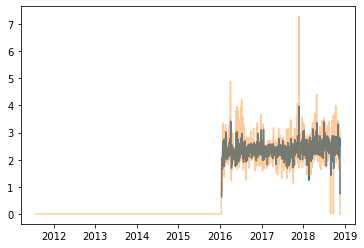

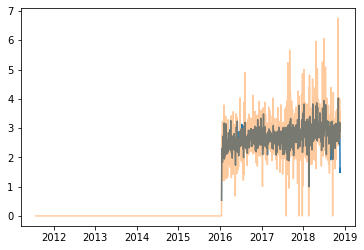

In [17]:
for i in range(8):
    plt.plot(y_pred[f"Label {i}"])
    plt.plot(res[f"Label {i}"], alpha=0.4)
    plt.show()
